In [29]:
import numpy as np

import pandas as pd
import os
import sys
import re
import glob
import seaborn as sns
from pathlib import Path
import os
from pprint import pprint
from typing import List, Tuple, Dict, Union, Optional

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams["font.family"] = "Arial"  # "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"  # x軸の目盛線を内向きへ
plt.rcParams["ytick.direction"] = "in"  # y軸の目盛線を内向きへ
plt.rcParams["xtick.minor.visible"] = True  # x軸補助目盛りの追加
plt.rcParams["ytick.minor.visible"] = True  # y軸補助目盛りの追加
# plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
# plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
# plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
# plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 10  # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 10  # y軸主目盛り線の長さ
plt.rcParams["xtick.minor.size"] = 5  # x軸補助目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 5  # y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 14  # フォントの大きさ
plt.rcParams["axes.linewidth"] = 1  # 囲みの太さ
plt.rcParams["figure.figsize"] = [5, 4]
# 目盛方向を両側, 目盛の長さを5ポイント, 目盛と目盛ラベルの色
# ax.tick_params(direction="in", length=10, colors="black", width=1)
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.right"] = True

# 目盛りの上限，下限用
from decimal import Decimal, ROUND_DOWN, ROUND_UP, ROUND_HALF_UP, getcontext
# getcontext().prec = 3
# ROUND = 2
def round_down(val, digits=0):
    if val >= 0:
        return float(Decimal(val).quantize(Decimal('1e%s' % (-digits)), rounding=ROUND_DOWN))
    else:
        return float(Decimal(val).quantize(Decimal('1e%s' % (-digits)), rounding=ROUND_UP))
def round_up(val, digits=0):
    if val >= 0:
        return float(Decimal(val).quantize(Decimal('1e%s' % (-digits)), rounding=ROUND_UP))
    else:
        return float(Decimal(val).quantize(Decimal('1e%s' % (-digits)), rounding=ROUND_DOWN))

# def search_min_max_step_substep(vals: np.array, mn = None, mx = None, substep_num: int = 2):
#     """良さげな最小値，最大値，ステップ，サブステップを探す
#     未検証

#     Args:
#         vals (np.array): _description_
#         substep_num (int, optional): _description_. Defaults to 2.

#     Raises:
#         ValueError: _description_

#     Returns:
#         _type_: _description_
#     """
#     if mn is None and mx is None:
#         rnd = 1
#         val_min = np.min(vals)
#         val_max = np.max(vals)
#         val_down = round_down(val_min, digits=rnd)
#         val_up = round_up(val_max, digits=rnd)
#         while (rnd < 10) or ((val_max - val_min) / (val_up - val_down) < 0.2):
#             val_down = round_down(val_min, digits=rnd)
#             val_up = round_up(val_max, digits=rnd)
#             rnd += 1
#         if rnd == 10:
#             raise ValueError("Error: too many digits")
#     elif mn is None and mx is not None: # 工事中
#         pass
#     elif mn is not None and mx is None: # 工事中
#         pass
#     else: # 工事中
#         pass
#     # min_str, max_str = str(val_down), str(val_up)
#     # idx = 0
#     # while min_str[idx] != max_str[idx]:
#     #     idx += 1
#     step_candidate = [4, 3, 2]
#     step = None
#     for stp in step_candidate:
#         if float(val_up - val_down)*(rnd+1) % stp == 0:
#             step = stp
#             break
#     if step is None:
#         step = 5
#     substep = step / substep_num
#     return val_down, val_up, step, substep


DIR = Path("/Users/uedataiga/Desktop/grad-research/data_analysis/Data/PPMS")
DIR

PosixPath('/Users/uedataiga/Desktop/grad-research/data_analysis/Data/PPMS')

In [94]:

def plot(x, y, label, xlabel, ylabel, MIN_X=None, MAX_X=None, X_STEP=None, SUB_X_STEP=None, MIN_Y=None, MAX_Y=None, Y_STEP=None, SUB_Y_STEP=None, savepath="", hlines=True, figsize=(2.5*1.5, 2*1.5), title="", suffix=""):
    """
    """
    MAX_X += 1e-10
    MAX_Y += 1e-10
    suffix = suffix
    # Figureを設定
    fig = plt.figure(figsize=figsize)
    # Axesを追加
    ax = fig.add_subplot(111)
    ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=3, linewidth=1, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")
    if hlines:
        ax.hlines(0, 0, MAX_Y, color='black', linestyles='dotted')
    else:
        pass

    # plt.show()
    # Axesのタイトルの設定
    ax.set_title(title)
    # 軸ラベルの設定
    ax.set_xlabel(xlabel, weight="light")
    ax.set_ylabel(ylabel, weight="light")
    # x軸の目盛設定
    # 入力がNoneなら，データの有効数字2桁で児童設定→したかったが，かなり難しい
    ax.set_xlim(MIN_X, MAX_X)
    ax.set_xticks(np.arange(MIN_X, MAX_X, step=X_STEP))
    # y軸の目盛設定
    ax.set_ylim(MIN_Y, MAX_Y)
    ax.set_yticks(np.arange(0, MAX_Y, step=Y_STEP))
    # 副目盛りの設定
    ax.minorticks_on()
    ax.tick_params(which="minor", direction="in", length=5, colors="black")
    ax.set_xticks(np.arange(MIN_X, MAX_X, step=SUB_X_STEP), minor=True)
    ax.set_yticks(np.arange(0, MAX_Y, step=SUB_Y_STEP), minor=True)
    savepath = str(savepath).replace(".png", f"{suffix}.png")
    plt.savefig(savepath, dpi=300, bbox_inches='tight', transparent=True)


1360
1364
1365
1362
1361
1357
{'sample': ['1360', '1364', '1365', '1362', '1361', '1357'], 'dirname': ['230719_#1-1359_#1-1360', '231003_#1-1364_#1-1365', '231003_#1-1364_#1-1365', '230726_#1-1362', '230720_#1-1361_#2-1421', '230628_#1-1357(CBST)'], 'x': [0.008, 0.012, 0.016, 0.02, 0.05, 0.08], 'H_c': [0.03174499609375, 0.0809447763671875, 0.0302332280273438, 0.0777958718261719, 0.2329408359375, 0.431263751953125], 'rho_yx_0T': [2763.121235351565, 6891.845848610912, 2692.329456204843, 4274.611469465119, 371.3791232161362, 94.0339269648727], 'temps': ['2.1K', '2.0K', '2.0K', '2.1K', '2.1K', '2.0K']}


<ipython-input-94-b41a595ab42a>:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, label, color="red", marker="o", linestyle="-", markersize=3, linewidth=1, markerfacecolor="red", markeredgewidth=2, markeredgecolor="red", markerfacecoloralt="red")  # , x="x", y="fwhm")


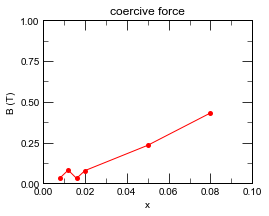

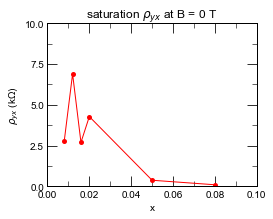

In [96]:
data = {
    "sample": ["1360", "1364", "1365", "1362", "1361", "1357"],
    "dirname": ["230719_#1-1359_#1-1360", "231003_#1-1364_#1-1365", "231003_#1-1364_#1-1365", "230726_#1-1362", "230720_#1-1361_#2-1421", "230628_#1-1357(CBST)"],
    "x": [0.008, 0.012, 0.016, 0.02, 0.05, 0.08],
    "H_c": [],
    "rho_yx_0T": [],
    "temps": []
}

for i in range(len(data["sample"])):
    SAMPLE = data["sample"][i]
    print(SAMPLE)
    MIN_X = 0
    MAX_X = 0.1
    X_STEP = 0.025
    SUB_X_STEP = X_STEP / 2
    dirname = data["dirname"][i]
    x = data["x"][i]
    dirpath = DIR / f"{dirname}/{SAMPLE}"


    globpath = glob.glob(str(dirpath / "Hall_2.*.csv"))
    df = pd.read_csv(globpath[0])

    # 保磁力H_c: Ryx_uの絶対値が0に最も近いときのB_ref_u
    # あるいは反対照化しているので同じだが，Ryx_dの絶対値が0に最も近いときのB_ref_dの絶対値
    # H_c = df["B_ref_u"][(np.abs(df["B_ref_u"]) <= 1.0) & (np.abs(df["Ryx_u"]).argmin())]
    df_tmp = df[(np.abs(df["B_ref_u"]) <= 1.0)]
    # print(df_tmp)
    # print(np.abs(df_tmp["Ryx_u"]).argmin())
    H_c = df_tmp["B_ref_u"].iloc[np.abs(df_tmp["Ryx_u"]).argmin()]

    # 飽和抵抗率ρ_yx_0T: B_ref_dの絶対値が0に近いときのRyx_dの値
    # あるいは反対照化しているので同じだが，B_ref_uの絶対値が0に近いときのRyx_uの絶対値
    rho_yx_0T = df["Ryx_d"][np.abs(df["B_ref_d"]).argmin()]

    data["H_c"].append(H_c)
    data["rho_yx_0T"].append(rho_yx_0T)
    data["temps"].append(globpath[0].split("_")[-1].replace(".csv", ""))

print(data)

savepath_H_c = DIR / f"summary/coercive_force.png"
savepath_rho_yx_0T = DIR / f"summary/rho_yx_0T.png"
# plot coersive force
MIN_X = 0
MAX_X = 0.1
X_STEP = 0.02
SUB_X_STEP = X_STEP / 2
MIN_Y = 0
MAX_Y = 1
Y_STEP = 0.25
SUB_Y_STEP = Y_STEP / 2
plot(data["x"], data["H_c"], "o", "x", "B (T)", MIN_X, MAX_X, X_STEP, SUB_X_STEP, MIN_Y, MAX_Y, Y_STEP, SUB_Y_STEP, savepath_H_c, hlines=False, title="coercive force", suffix="")

# plot rho_yx_0T
MIN_Y = 0
MAX_Y = 10
Y_STEP = 2.5
SUB_Y_STEP = Y_STEP / 2
data_rho_yx_0T = np.array(data["rho_yx_0T"]) * 1e-3
plot(data["x"], data_rho_yx_0T, "o", "x", r"$\rho_{yx}$ (kΩ)", MIN_X, MAX_X, X_STEP, SUB_X_STEP, MIN_Y, MAX_Y, Y_STEP, SUB_Y_STEP, savepath_rho_yx_0T, hlines=False, title=r"saturation $ \rho_{yx}$ at B = 0 T", suffix="")

In [73]:
data

{'sample': ['1360', '1364', '1365', '1362', '1361', '1357'],
 'dirname': ['230719_#1-1359_#1-1360',
  '231003_#1-1364_#1-1365',
  '231003_#1-1364_#1-1365',
  '230726_#1-1362',
  '230720_#1-1361_#2-1421',
  '230628_#1-1357(CBST)'],
 'x': [0.008, 0.012, 0.016, 0.02, 0.05, 0.08],
 'H_c': [-7.550069250000001,
  0.0809447763671875,
  0.0302332280273438,
  0.0777958718261719,
  0.2329408359375,
  0.431263751953125],
 'rho_yx_0T': [2763.121235351565,
  6891.845848610912,
  2692.329456204843,
  4274.611469465119,
  371.3791232161362,
  94.0339269648727],
 'temps': ['2.1K', '2.0K', '2.0K', '2.1K', '2.1K', '2.0K']}